In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.model_selection import PredefinedSplit
from sklearn import preprocessing
import numpy as np
from pandas import read_csv

In [4]:
TRAIN_DIR = '../datasets/train_images.npy'
TRAIN_LABEL_DIR = '../datasets/train_labels.csv'
TEST_DIR = '../datasets/test_images.npy'
TRAIN_DIR_PRE = '../datasets/train_images_preprocessed.npy'
TEST_DIR_PRE = '../datasets/test_images_preprocessed.npy'

In [7]:
train_images = np.load(TRAIN_DIR_PRE, encoding="latin1")
test_images = np.load(TEST_DIR_PRE, encoding="latin1")
train_labels = np.array(read_csv(TRAIN_LABEL_DIR, delimiter=","))
le = preprocessing.LabelEncoder()
train_labels = le.fit_transform(train_labels[:,1])

In [8]:
def svm_linear_tuning(X, Y, train_size, valid_size, param,verbose=0):
    
    test_fold = np.hstack((-1*np.ones(train_size), np.zeros(valid_size)))
    ps = PredefinedSplit(test_fold)
    
    grid_search_clf = GridSearchCV(LinearSVC(),param,cv = ps,verbose=verbose,scoring = 'f1_micro',return_train_score=True)
    grid_search_clf.fit(X, Y)
    return grid_search_clf

In [9]:
train_valid_X = train_images[:9000,1]
train_valid_Y = train_labels[:9000]

# valid_X = train_images[8000:9000,1]
# valid_Y = train_labels[8000:9000,1]

test_X = train_images[9000:,1]
test_Y = train_labels[9000:]


In [12]:
svm_param = {'C' : [1000]}
SVM = svm_linear_tuning(list(train_valid_X),train_valid_Y,8000,1000,svm_param,verbose=3)

Fitting 1 folds for each of 1 candidates, totalling 1 fits
[CV] C=1000 ..........................................................
[CV] .............................. C=1000, score=0.245, total=  40.6s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   40.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   40.7s finished


In [52]:
svm_param = {'C' : np.linspace(1e-7,1e-3,10)}
SVM2 =  svm_linear_tuning(list(train_valid_X),train_valid_Y,8000,1000,svm_param,verbose=3)

Fitting 1 folds for each of 10 candidates, totalling 10 fits
[CV] C=1e-07 .........................................................
[CV] ............................. C=1e-07, score=0.419, total=   1.8s
[CV] C=0.00011119999999999999 ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV] ............ C=0.00011119999999999999, score=0.337, total=  37.4s
[CV] C=0.00022229999999999998 ........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   39.3s remaining:    0.0s


[CV] ............ C=0.00022229999999999998, score=0.314, total=  35.3s
[CV] C=0.00033339999999999997 ........................................
[CV] ............ C=0.00033339999999999997, score=0.312, total=  34.3s
[CV] C=0.00044449999999999996 ........................................
[CV] ............ C=0.00044449999999999996, score=0.299, total=  33.7s
[CV] C=0.0005556 .....................................................
[CV] ........................... C=0.0005556, score=0.3, total=  33.3s
[CV] C=0.0006666999999999999 .........................................
[CV] ............. C=0.0006666999999999999, score=0.303, total=  33.1s
[CV] C=0.0007777999999999998 .........................................
[CV] ............. C=0.0007777999999999998, score=0.301, total=  33.0s
[CV] C=0.0008888999999999999 .........................................
[CV] ............. C=0.0008888999999999999, score=0.298, total=  42.8s
[CV] C=0.001 .........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  5.6min finished


In [227]:
svm_param = {'C' : np.linspace(1e-9,100,10)}
SVM3 =  svm_linear_tuning(list(train_valid_X),train_valid_Y,8000,1000,svm_param,verbose=3)

Fitting 1 folds for each of 10 candidates, totalling 10 fits
[CV] C=1e-09 .........................................................
[CV] ............................. C=1e-09, score=0.217, total=   2.9s
[CV] C=11.111111112 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s


[CV] ...................... C=11.111111112, score=0.248, total=  33.4s
[CV] C=22.222222223 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   36.5s remaining:    0.0s


[CV] ...................... C=22.222222223, score=0.248, total=  33.5s
[CV] C=33.333333333999995 ............................................
[CV] ................ C=33.333333333999995, score=0.237, total=  33.5s
[CV] C=44.444444444999995 ............................................
[CV] ................ C=44.444444444999995, score=0.249, total=  33.3s
[CV] C=55.555555555999995 ............................................
[CV] ................ C=55.555555555999995, score=0.232, total=  33.4s
[CV] C=66.666666667 ..................................................
[CV] ...................... C=66.666666667, score=0.251, total=  33.2s
[CV] C=77.777777778 ..................................................
[CV] ...................... C=77.777777778, score=0.236, total=  33.6s
[CV] C=88.888888889 ..................................................
[CV] ...................... C=88.888888889, score=0.247, total=  33.4s
[CV] C=100.0 .........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  5.1min finished


In [50]:
with open('./model/svm_best_param.txt','w') as f:
    f.write(str(SVM.best_estimator_))

In [59]:
[SVM.best_estimator_.C,SVM.best_score_]

[4.0, 0.258]

In [58]:
[SVM2.best_estimator_.C,SVM2.best_score_]

[1e-07, 0.419]

In [212]:
print("Hyperparameter tune on: "+str(SVM2.param_grid))
print("Best hyperparameter C is: "+ str(SVM2.best_estimator_.C))
print("Best peformance on validation set: "+str(SVM2.score(list(train_valid_X),train_valid_Y))) 
print("Best peformance on test set: "+str(SVM2.score(list(test_X),test_Y)))

Hyperparameter tune on: {'C': array([1.000e-07, 1.112e-04, 2.223e-04, 3.334e-04, 4.445e-04, 5.556e-04,
       6.667e-04, 7.778e-04, 8.889e-04, 1.000e-03])}
Best hyperparameter C is: 1e-07
Best peformance on validation set: 0.4517777777777778
Best peformance on test set: 0.399


In [235]:
print("Hyperparameter tune on: "+str(SVM.param_grid))
print("Best hyperparameter C is: "+ str(SVM.best_estimator_.C))
print("Best peformance on validation set: "+str(SVM.score(list(train_valid_X),train_valid_Y))) # C = 4
print("Best peformance on test set: "+str(SVM.score(list(test_X),test_Y)))

Hyperparameter tune on: {'C': array([1.00000000e-09, 4.44444445e-01, 8.88888890e-01, 1.33333333e+00,
       1.77777778e+00, 2.22222222e+00, 2.66666667e+00, 3.11111111e+00,
       3.55555556e+00, 4.00000000e+00])}
Best hyperparameter C is: 4.0
Best peformance on validation set: 0.6394444444444445
Best peformance on test set: 0.216


In [236]:
print("Hyperparameter tune on: "+str(SVM3.param_grid))
print("Best hyperparameter C is: "+ str(SVM3.best_estimator_.C))
print("Best peformance on validation set: "+str(SVM3.score(list(train_valid_X),train_valid_Y))) # C = 4
print("Best peformance on test set: "+str(SVM3.score(list(test_X),test_Y)))

Hyperparameter tune on: {'C': array([1.00000000e-09, 1.11111111e+01, 2.22222222e+01, 3.33333333e+01,
       4.44444444e+01, 5.55555556e+01, 6.66666667e+01, 7.77777778e+01,
       8.88888889e+01, 1.00000000e+02])}
Best hyperparameter C is: 66.666666667
Best peformance on validation set: 0.6348888888888888
Best peformance on test set: 0.218


In [204]:
SVM.score(list(test_X),test_Y)

0.216

In [65]:
SVM2.score(list(test_X),test_Y)

0.399

In [75]:
import matplotlib.pyplot as plt

In [237]:
a1 = list(SVM.cv_results_.get('param_C').data)
a2 = list(SVM.cv_results_.get('mean_test_score'))
b1 = list(SVM2.cv_results_.get('param_C').data)
b2 = list(SVM2.cv_results_.get('mean_test_score'))
c1 = list(SVM3.cv_results_.get('param_C').data)
c2 = list(SVM3.cv_results_.get('mean_test_score'))

Text(0.5,1,'SVM2')

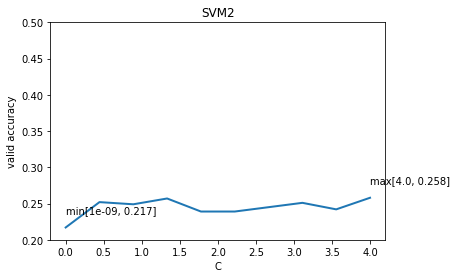

In [234]:
fig = plt.figure()
ax = fig.add_subplot(111)

line, = ax.plot(a1, a2, lw=2)
min_v = min(a2)
max_v = max(a2)
for k,v in zip(a1,a2):
    if v == min_v:
        ax.annotate('min'+str([k,v]), xy=(k,v),xytext=(k, v+0.02))
    elif v == max_v:
        ax.annotate('max'+str([k,v]), xy=(k,v),xytext=(k, v+0.02))
ax.set_ylim(0.2,0.5)
ax.set_ylabel('valid accuracy')
ax.set_xlabel('C')
ax.set_title('SVM2')

Text(0.5,1,'SVM1')

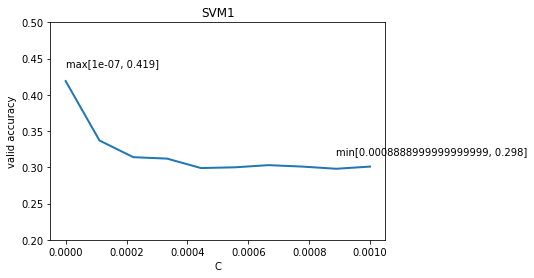

In [240]:
fig = plt.figure()
ax = fig.add_subplot(111)
line, = ax.plot(b1, b2, lw=2)
min_v = min(b2)
max_v = max(b2)
for k,v in zip(b1,b2):
    if v == min_v:
        ax.annotate('min'+str([k,v]), xy=(k,v),xytext=(k, v+0.02))
    elif v == max_v:
        ax.annotate('max'+str([k,v]), xy=(k,v),xytext=(k, v+0.02))
ax.set_ylim(0.2,0.5)
ax.set_ylabel('valid accuracy')
ax.set_xlabel('C')
ax.set_title('SVM1')

Text(0.5,1,'SVM3')

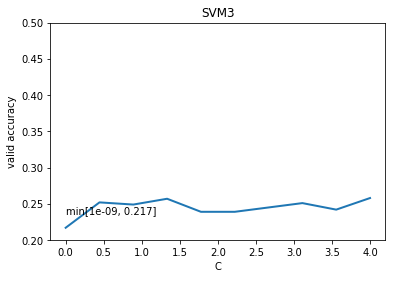

In [239]:
fig = plt.figure()
ax = fig.add_subplot(111)

line, = ax.plot(a1, a2, lw=2)
min_v = min(c2)
max_v = max(c2)
for k,v in zip(c1,c2):
    if v == min_v:
        ax.annotate('min'+str([k,v]), xy=(k,v),xytext=(k, v+0.02))
    elif v == max_v:
        ax.annotate('max'+str([k,v]), xy=(k,v),xytext=(k, v+0.02))
ax.set_ylim(0.2,0.5)
ax.set_ylabel('valid accuracy')
ax.set_xlabel('C')
ax.set_title('SVM3')